# Import libraries

In [1]:
import os

# data manipulation
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('whitegrid')

# Import dataset
The dataset is separated into 6 different csv files. And I am going to merge them all into single dataframe.

In [2]:
files = [file for file in os.listdir('./Uber-dataset') if file.endswith('.csv')]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [3]:
df = pd.DataFrame()

for file in files:
    file_df = pd.read_csv('./Uber-dataset/' + file)
    df = pd.concat([df,file_df])
    
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 173.0+ MB


In [5]:
df.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

Our dataset consists of 4 variables. There is no missing values in any columns.

# Feature Engineering
Let's convert the 'Date/Time' columns into datetime object. It enables us to extract useful informations from this column later.

In [6]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Date/Time']

0         2014-04-01 00:11:00
1         2014-04-01 00:17:00
2         2014-04-01 00:21:00
3         2014-04-01 00:28:00
4         2014-04-01 00:33:00
                  ...        
1028131   2014-09-30 22:57:00
1028132   2014-09-30 22:57:00
1028133   2014-09-30 22:58:00
1028134   2014-09-30 22:58:00
1028135   2014-09-30 22:58:00
Name: Date/Time, Length: 4534327, dtype: datetime64[ns]

From this 'Date/Time' column, we can extract month, day of month, day of the week and hour.

In [7]:
df['Month'] = df['Date/Time'].apply(lambda x: x.month)
df['Day'] = df['Date/Time'].apply(lambda x: x.day)
df['Day_of_Week'] = df['Date/Time'].apply(lambda x: x.dayofweek)
df['Hour'] = df['Date/Time'].apply(lambda x: x.hour)

In [8]:
df.head()

,Date/Time,Lat,Lon,Base,Month,Day,Day_of_Week,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,1,0


Let's change the values in 'Day_of_Week' column to their representative days to make it easier for us to do analysis later. Same goes to the 'Month' column.

In [9]:
day_of_week = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Day_of_Week'] = df['Day_of_Week'].map(day_of_week)

month = {4:'April',5:'May',6:'June',7:'July',8:'August',9:'September'}
df['Month'] = df['Month'].map(month)

# Exploratory Data Analysis
First, let's see which day has the most trip.

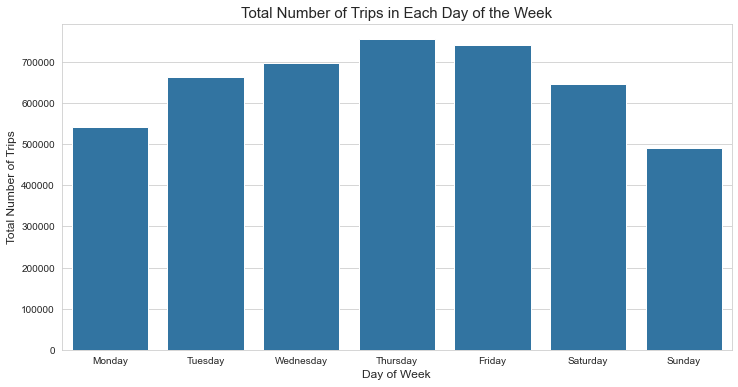

In [10]:
sns.countplot(x='Day_of_Week',data=df,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],color='C0')
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.title('Total Number of Trips in Each Day of the Week', fontsize=15);

We can clearly see Thursday has the most number of trips. Meanwhile, Sunday is the least one.

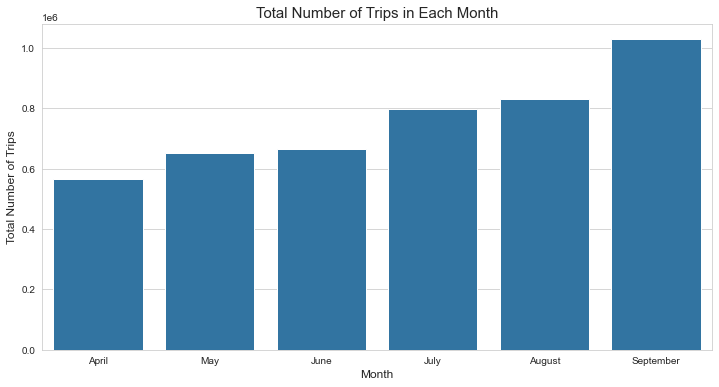

In [11]:
sns.countplot(x='Month',data=df,order=['April','May','June','July','August','September'],color='C0')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.title('Total Number of Trips in Each Month', fontsize=15);

In [12]:
april_trip = df.groupby('Month').count()['Base']['April']
september_trip = df.groupby('Month').count()['Base']['September']

perc_inc = (september_trip - april_trip) / april_trip * 100
perc_inc

82.12699020045491

The total number of trips increases from month to month. In September, the number of trips increases about 82% compared to the number of trips in April.

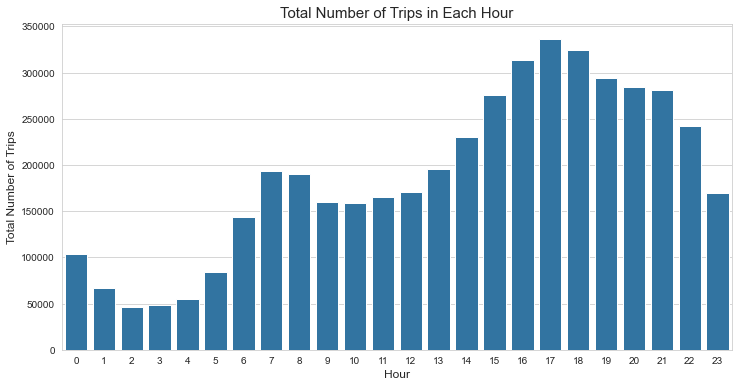

In [13]:
sns.countplot(x='Hour',data=df,color='C0')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.title('Total Number of Trips in Each Hour', fontsize=15);

We can see two peaks here. The first one is at 7 to 8 interval. At this hour, people might use Uber to go to work. But it is not that high compared to the second peak, which is at 17 to 18 interval. This is the time where people go back home usually.

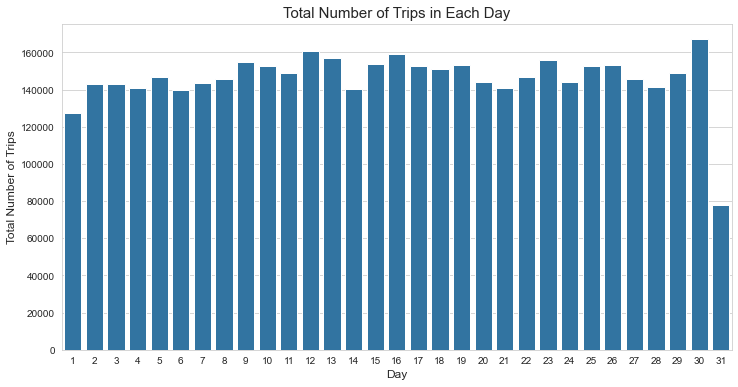

In [14]:
sns.countplot(x='Day',data=df,color='C0')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.title('Total Number of Trips in Each Day', fontsize=15);

Almost all days have only slight differences of number of trips. Except the last day of the month. But, if we recall it correctly, our dataset consists of raw data from April to September. As we know, there is no Day 31 in April, June and September. That's why the number of trips in Day 31 has been reduced to half.

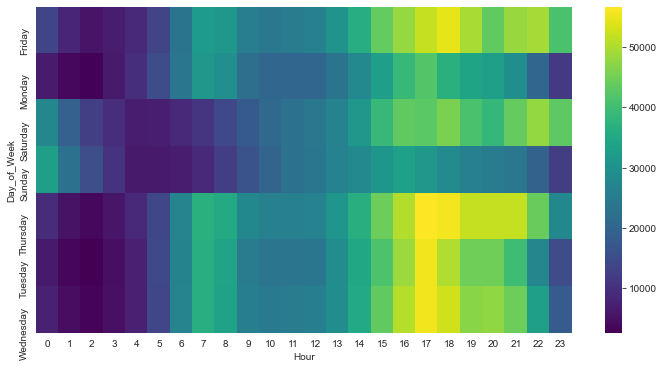

In [15]:
groupby_hour = df.groupby(['Hour','Day_of_Week']).count()['Day'].reset_index()
groupby_hour = pd.pivot_table(data=groupby_hour,index='Day_of_Week',columns='Hour',values='Day')
sns.heatmap(groupby_hour, cmap='viridis');

There is low number of trips for the first 5 hours during weekday, but during weekend, the number is quite high at midnight and only start decreasing at 4. There is a high dense indicating high number of trips starting from 15 onwards, especially at 17 to 18 intervals on Tuesday, Wednesday, Thursday and Friday.

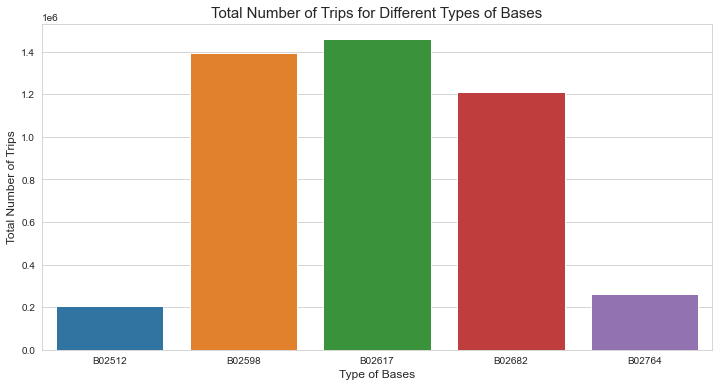

In [16]:
sns.countplot(x='Base',data=df)
plt.xlabel('Type of Bases', fontsize=12)
plt.ylabel('Total Number of Trips', fontsize=12)
plt.title('Total Number of Trips for Different Types of Bases', fontsize=15);

B0598, B02617 and B02682 are among the bases with high number of trips. The other two bases are not even half of the third most number of trips.

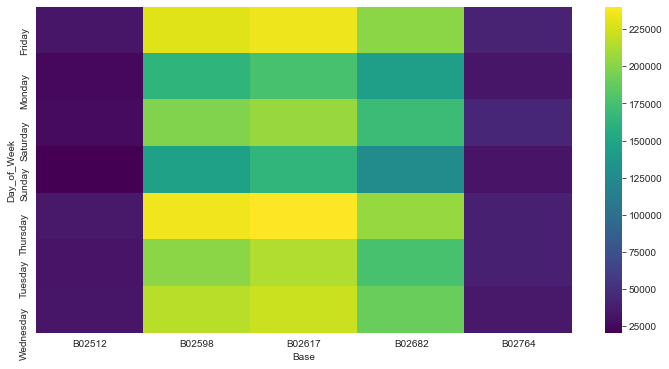

In [17]:
groupby_base = df.groupby(['Base','Day_of_Week']).count()['Day'].reset_index()
groupby_base = pd.pivot_table(data=groupby_base,index='Day_of_Week',columns='Base',values='Day')
sns.heatmap(groupby_base, cmap='viridis');

Just like what we observed before, there is less number of trips for both B02512 and B02764. There is a high number of trips for B0598 and B02617 on Thursday and Friday just by looking at the color dense (the yellow one).

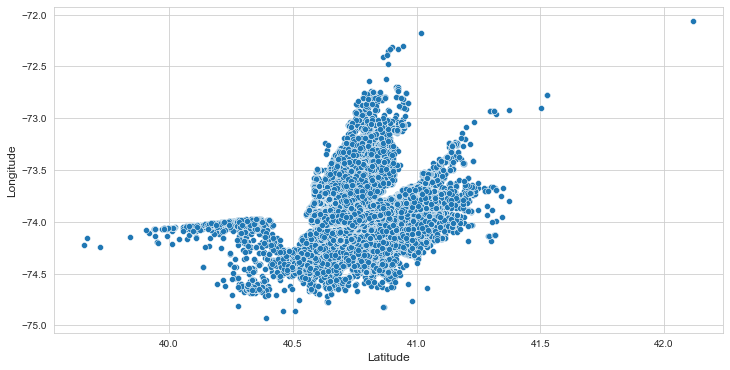

In [18]:
sns.scatterplot(data=df,x='Lat',y='Lon')
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Longitude',fontsize=12);

If we plot these latitude and longitude, it formed a shape. This is a map of New York. But, I will skip this part since I don't know much about New York.